# Data analysis and feature extraction with Python


I was a kid when the movie 'Titanic' was released. In my mind, I still keep a picture of all those people, outside the cinema, in the queue to buy tickets. Back then, Leonardo DiCaprio and Kate Winslet were just two young kids with nice haircuts and online tickets were science fiction.

According to engineers, a class to which I proudly belong, the Titanic was the unsinkable ship. It was beautiful, luxurious and fitted with the best of the technology. Titanic was the state-of-the-art cruiser. It just wasn't that unsinkable.

After 100 years, the Titanic still remains a discussion subject in the most diverse areas. For example, you can find [books](https://amzn.to/2Gie0Pv) where the author take leadership lessons from the Titanic to apply in business; you can find interesting [AI projects](http://fortune.com/2018/03/26/china-titanic-artificial-intelligence-sensetime/) that apply deep learning to distinguish Titanic’s romantic scenes from disaster scenes; or you can find extensive exercises of creative thinking regarding [what really happened with the Titanic](https://www.bustle.com/p/6-titanic-conspiracy-theories-that-are-still-fascinating-today-28519).

We will also use Titanic for a specific purpose: to learn **exploratory data analysis** and **feature extraction** techniques. Through a complete analysis of the Kaggle's Titanic problem, we will see what to do, where to begin and how to proceed in a data science problem. Topics like **data visualization**, **missing data imputation**, **feature engineering**, **feature selection**, and **logistic regression** will be addressed, serving you repeatedly because after you see what's involved, you'll be able to apply these techniques to any kind of data science problem.


This kernel has been divided into four parts. The first part deals with the development of a baseline model. This model should allow us to quickly understand the problem and the data. Afterwards, we will go into detail. Data will be studied and enriched through exploratory data analysis and feature extraction, to improve the performance of our machine learning model. Finally, some conclusions will be drawn from this kernel and its impact in our data science journey.

**Index**

1. [The lean data set](#1.-The-lean-data-set)

 1.1. [Doing the pitch](#1.1.-Doing-the-pitch)
 
 1.2. [Showing the numbers](#1.2.-Showing-the-numbers)
 
 1.3. [Filling the gaps](#1.3.-Filling-the-gaps)
 
 1.4. [Minimum viable model](#1.4.-Minimum-viable-model)
 
2. [The chubby data set](#2.-The-chubby-data-set)
 
 2.1. [Imputation of 'Age' missing data](#2.1.-Imputation-of-'Age'-missing-data)
 
 2.2. [Exploratory data analysis](#2.2.-Exploratory-data-analysis)
 
 2.3. [Feature extraction](#2.3.-Feature-extraction)
 
3. [Unicorn model](#3.-Unicorn-model)

 3.1. [Fit model for best feature combination](#3.1.-Fit-model-for-best-feature-combination)
 
 3.2. [Learning curve](#3.2.-Learning-curve)
 
 3.3. [Validation curve](#3.3.-Validation-curve)
 
 3.4. [Submit predictions](#3.4.-Submit-predictions)
 
4. [Conclusion](#4.-Conclusion)


---

## Imports

In [40]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Functions

In [20]:
# Create table for missing data analysis
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

---

## 1.1. Doing the pitch

Startups use pitches to sell their idea. Accordingly, their pitch should be clear and concise, answering questions such as 'what do you do?', 'what do you want?', and 'who's on your team?'. The pitch is important because investors are more willing to invest when they understand what you're doing. 

Let's return the first rows of our data set to get a clear and concise picture of what is there and what we can do with it.

In [4]:
# Import data
df = pd.read_csv('train.csv')
df_raw = df.copy()  # Save original data set, just in case.

In [5]:
# Overview
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Definitions and quick thoughts: 

* **PassengerId**. Unique identification of the passenger. It shouldn't be necessary for the machine learning model.
* **Survived**. Survival (0 = No, 1 = Yes). Binary variable that will be our target variable.
* **Pclass**. Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd). Ready to go.
* **Name**. Name of the passenger. We need to parse before using it.
* **Sex**. Sex. Categorical variable that should be [encoded](http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-categorical-features).
* **Age**. Age in years. Ready to go.
* **SibSp**. # of siblings / spouses aboard the Titanic. Ready to go.
* **Parch**. # of parents / children aboard the Titanic. Ready to go.
* **Ticket**. Ticket number. Big mess. We need to understand its structure first.
* **Fare**. Passenger fare. Ready to go.
* **Cabin**. Cabin number. It needs to be parsed.
* **Embarked**. Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton). Categorical feature that should be encoded.

The main conclusion is that we already have a set of features that we can easily use in our machine learning model. Other features, like 'Name', 'Ticket', and 'Fare', require an additional effort before we can integrate them.

## 1.2. Showing the numbers

In [6]:
# Descriptive statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There are three aspects that usually catch my attention when I analyse descriptive statistics:
1. **Min and max values**. This can give us an idea about the range of values and is helpful to detect outliers. In our case, all the min and max values seem reasonable and in a reasonable range of values. The only exception could eventually be the max value of 'Fare', but for now we will leave it as it is.
2. **Mean and standard deviation**. The mean shows us the central tendency of the distribution, while the standard deviation quantifies its amount of variation. For example, a low standard deviation suggests that data points tend to be close to the mean. Giving a quick look to our values, there's nothing that looks like obviously wrong.
3. **Count**. This is important to give us a first perception about the volume of missing data. Here, we can see that some 'Age' data is missing.

Since there's nothing shocking about the variables, let's proceed to the next step: missing data.

## 1.3. Filling the gaps


There are several strategies to deal with missing data. Some of the most common are: 
* Use only valid data, deleting the cases where data is missing.  
* Impute data using values from similar cases or using the mean value. 
* Impute data using model-based methods, in which models are defined to predict the missing values.


Now that we can see the tip of the iceberg, let's dive into the subject.

In [7]:
# Analyse missing data
draw_missing_data_table(df)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


First thoughts:

* 'Cabin' has too many missing values (>25%). Dogma! We need to delete this variable right away.
* 'Age' can be imputed. For now, I'll associate a value that allows me to know that I'm imputing data. Later, I'll revise this strategy.
* Due to the low percentage of missing values, I'll delete the observations where we don't know 'Embarked'.

In [8]:
# Drop Cabin
#df.drop('Cabin', axis=1, inplace=True)
df.drop('Cabin', axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Fill missing values in Age with a specific value
value = 1000
df['Age'].fillna(1000)
df['Age'].max()

80.0

In [10]:
# Delete observations without Embarked
df.drop(df[pd.isnull(df['Embarked'])].index)  # Get index of points where Embarked is null
df[pd.isnull(df['Embarked'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### 1.4.1. Preparing the data

In [11]:
# Data types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

* We don't need 'PassengerId' for prediction purposes, so we will exclude it.
* 'Sex', 'Embarked', and 'Pclass' should be categorical. I'll not consider 'Survived' as categorical because it's the output variable.
* We need to parse 'Name' and 'Ticket'. For now, I'll ignore these features.
* 'SibSp' could be grouped with 'Parch' to create a 'Family' feature. For now, I'll just identify if the passenger is travelling alone or with family.

In [12]:
# Drop PassengerId
df.drop('PassengerId', axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# Define categorical variables
df['Sex'] = pd.Categorical(df['Sex'])
df['Embarked'] = pd.Categorical(df['Embarked'])

In [14]:
# Create Family feature
df['FamilySize'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [15]:
# Drop SibSp and Parch
df.drop('SibSp',axis=1)
df.drop('Parch',axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [16]:
# Drop Name and Ticket
df.drop('Name', axis=1)
df.drop('Ticket', axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


### 1.4.2. Launching the model

In [17]:
# Transform categorical variables into dummy variables
df = pd.get_dummies(df, drop_first=True)  # To avoid dummy trap
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Extra: [What is the 'dummy variable trap'?](http://www.algosome.com/articles/dummy-variable-trap-regression.html)

---

In [29]:
# Restart data set
df = df_raw.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
# Family size feature
df['FamilySize'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [31]:
# Drop SibSp and Parch
df.drop('SibSp',axis=1)
df.drop('Parch',axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [32]:
# Drop irrelevant features
df.drop(['Name','Ticket','Cabin'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## 2.1. Imputation of 'Age' missing data

Our initial approach to estimate 'Age' missing values was to fill with a placeholder value (1000). This allowed us to quickly get a complete data set, in which was easy to identify imputed values. Since our goal was to have a working end-to-end pipeline as fast as possible, this approach was ok. However, it has several limitations. For example, we are using unrealistic replacement values, which are out of range and distort data distribution. Accordingly, now that we are improving the model, it makes sense to develop a different imputation method.

One way to improve our imputation method is to estimate the missing values based on known relationships. In our case, we can do this by using the information in the variable 'Name'. Looking to 'Name' values, we can see person's name and title. Person's title is a relevant information to estimate ages. To give an example, we know that a person with the title 'Master' is someone under 13 years old, since ['a boy can be addressed as master only until age 12'](http://bit.ly/2HfFHZr). Therefore, employing the information in 'Name' we can improve our imputation method.

The steps to implement this new imputation method are:
* Extract titles from 'Name'.
* Plot a figure with both features and confirm that there is a connection between titles and age.
* For each title, get people's average age and use it to fill missing values.

Let's see how this work, before you start with sinking feelings.

In [33]:
# Inspect names
df_raw['Name'].unique()[:10]

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)'], dtype=object)

* The rule seems to be: *'last name'* + *','* + *'title'* + *'other names'*

In [34]:
# Extract titles from name
df['Title']=0
for i in df:
    df['Title']=df_raw['Name'].str.extract('([A-Za-z]+)\.', expand=False)  # Use REGEX to define a search pattern
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr


In [35]:
# Unique titles
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

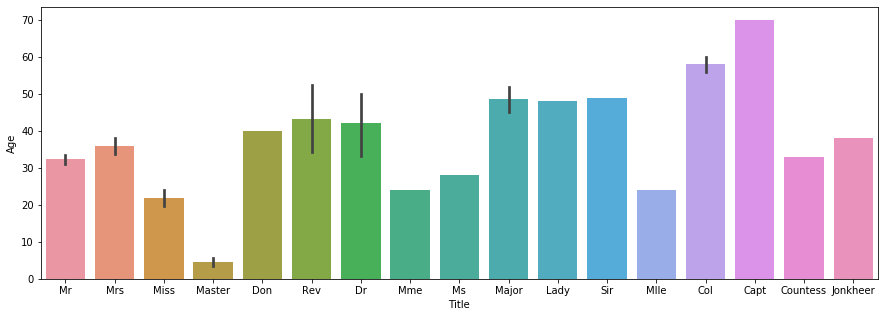

In [41]:
# Plot bar plot (titles, age and sex)
plt.figure(figsize=(15,5))
sns.barplot(x=df['Title'], y=df_raw['Age']);

* Bar plot gives us an estimate of central tendency for a numeric variable (height of each rectangle) and an indication of the uncertainty around that estimate (error bars in black).
* Apart from Rev and Dr, which have a larger error bar, the mean value seems to accurately represent the data of all the other features. This validates our approach.
* [Here](https://www.biologyforlife.com/interpreting-error-bars.html) you can find a short and sweet intro to error bars interpretation.

In [42]:
# Means per title
df_raw['Title'] = df['Title']  # To simplify data handling
means = df_raw.groupby('Title')['Age'].mean()
means.head()

Title
Capt        70.0
Col         58.0
Countess    33.0
Don         40.0
Dr          42.0
Name: Age, dtype: float64

In [43]:
# Transform means into a dictionary for future mapping
map_means = means.to_dict()
map_means

{'Capt': 70.0,
 'Col': 58.0,
 'Countess': 33.0,
 'Don': 40.0,
 'Dr': 42.0,
 'Jonkheer': 38.0,
 'Lady': 48.0,
 'Major': 48.5,
 'Master': 4.574166666666667,
 'Miss': 21.773972602739725,
 'Mlle': 24.0,
 'Mme': 24.0,
 'Mr': 32.368090452261306,
 'Mrs': 35.898148148148145,
 'Ms': 28.0,
 'Rev': 43.166666666666664,
 'Sir': 49.0}

In [44]:
# Impute ages based on titles
idx_nan_age = df.loc[np.isnan(df['Age'])].index
df.loc[idx_nan_age,'Age'].loc[idx_nan_age] = df['Title'].loc[idx_nan_age].map(map_means)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr


In [45]:
# Identify imputed data
df['Imputed'] = 0
df.at[idx_nan_age.values, 'Imputed'] = 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,Imputed
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr,0


## 2.2. Exploratory data analysis


* Increase speed. Since we will limit our analysis to some hypothesis and move forward.
* Reduce effort. The amount of data and the number of tests will be only what is needed to verify your hypothesis. 
* Reduce risk. If you're right you succeed fast, if you're wrong you fail fast.


Let's get started:

* **PassengerId**. This is just an unique identification of each passenger. It's not expected to be relevant to our analysis.
* **Survived**. Target variable. To sink or not to sink is the question of this exercise.
* **Pclass**. This is the ticket class. According to Karl Marx, this should affect our target variable. First class should have a higher survival rate.
* **Name**. Names are a form of social tagging, especially when accompanied by a title. As a consequence, it can lead to different forms of treatment. Let's keep an eye on this.
* **Sex**. Always important.
* **Age**. It should make a difference. For example, children are usually evacuated first in a disaster, so that we can think about a solution in silence... Joking, the true reason why 'Age' matters is this [one](http://www.dailymail.co.uk/sciencetech/article-1254788/Why-women-children-saved-Titanic-Lusitania.html#ixzz54KETWEPr).
* **SibSp**. Number of siblings/spouses aboard the Titanic. I'd say that it's easier to survive if you're with your family than if you're travelling alone. [Teamwork](https://youtu.be/1qzzYrCTKuk)!
* **Parch**. Number of parents/children aboard the Titanic. It should play with 'SibSp'.
* **Ticket**. This is the ticket number. Unless it has some information about places, it shouldn't be important for prediction purposes.
* **Fare**. Same logic as 'Pclass'.
* **Cabin**. The cabin number can indicate where people were during the disaster. It wouldn't be surprising if it had some influence in survival chances, but this variable was excluded due to the high percentage of missing values.
* **Embarked**. When the sun rises, it rises for everyone. It's not expectable that people coming from Cherbourg are more unlucky than people coming from Southampton. Unless there is some second order effect, [like refusing to run away to keep your honor as a man](http://www.mindblowing-facts.org/2013/07/the-only-japanese-who-survived-the-titanic-lost-his-job-because-he-was-known-as-a-coward-in-japan-for-not-dying-with-the-other-passengers/), I would say that this variable is not important.

Now, step by step, let's perform our analysis.

### 2.2.1. Pclass

Our hypothesis is that the higher the class, the higher the chances of survival. This means that a person travelling in the first class has a higher chance of survival than a person traveling on the second or third class.

To visualize if there is a relationship between 'Pclass' and 'Survival', let's do a bar plot.

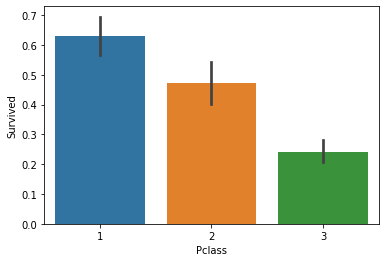

In [46]:
# Plot
sns.barplot(df['Pclass'],df['Survived']);

As we can see, about 60% of the people travelling in the first class survived. In contrast, only approximately 25% of the people travelling in the third class survived. Accordingly, this plot suggests that the class in which people travel affects the chances of survival.

### 2.2.2. Name/Title

Our assumption is that people's title influences how they are treated. In our case, we have several titles, but only some of them are shared by a significant number of people. Accordingly, it would be interesting if we could group some of the titles and simplify our analysis. 

Let's analyse the title and see if we can can find a sensible way to group them. Then, we test our new groups and, if it works in an acceptable way, we keep it. For now, optimization will not be a goal. The focus is on getting something that can improve our current situation.

In [47]:
# Count how many people have each of the titles
df.groupby(['Title'])['PassengerId'].count()

Title
Capt          1
Col           2
Countess      1
Don           1
Dr            7
Jonkheer      1
Lady          1
Major         2
Master       40
Miss        182
Mlle          2
Mme           1
Mr          517
Mrs         125
Ms            1
Rev           6
Sir           1
Name: PassengerId, dtype: int64

From the results above we can see that:

* Titles like 'Master', 'Miss', 'Mr', and 'Mrs', appear several times. Accordingly, we will not group them.
* Regarding Mme and Mlle, we can see [here](https://www.frenchtoday.com/blog/french-culture/madame-or-mademoiselle-a-delicate-question) that they correspond to the categories Mrs and Miss, respectively. As a consequence, we will assign them to those titles.
* Finally, we will group all the other titles in a new title named 'Other'. Then, we will define 'Title' as a categorical feature and plot it to see how it looks like. If it looks ok, we will proceed with this new categorization.

In [48]:
# Map of aggregated titles:
titles_dict = {'Capt': 'Other',
               'Major': 'Other',
               'Jonkheer': 'Other',
               'Don': 'Other',
               'Sir': 'Other',
               'Dr': 'Other',
               'Rev': 'Other',
               'Countess': 'Other',
               'Dona': 'Other',
               'Mme': 'Mrs',
               'Mlle': 'Miss',
               'Ms': 'Miss',
               'Mr': 'Mr',
               'Mrs': 'Mrs',
               'Miss': 'Miss',
               'Master': 'Master',
               'Lady': 'Other'}

In [49]:
# Group titles
df['Title'] = df['Title'].map(titles_dict)
df['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [50]:
# Transform into categorical
df['Title'] = pd.Categorical(df['Title'])
df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
FamilySize        int64
Title          category
Imputed           int64
dtype: object

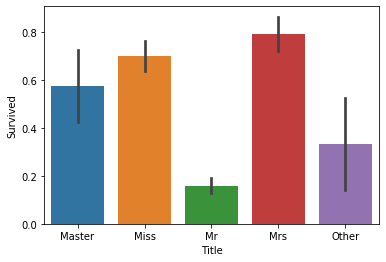

In [51]:
# Plot
sns.barplot(x='Title', y='Survived', data=df);

As we already know, the bar plot shows us an estimate of the mean value (height of each rectangle) and an indication of the uncertainty around that central tendency (error bars).

Our results suggest that:
* People with the title 'Mr' survived less than people with any other title. 
* Titles with a survival rate higher than 50% are those that correspond to female (Miss or Mrs) or children (Master) titles.
* Our new category, 'Other', should be more discretized. As we can see by the error bar (black line), there is a significant uncertainty around the mean value. Probably, one of the problems is that we are mixing male and female titles in the 'Other' category. We should proceed with a more detailed analysis to sort this out. Also, the category 'Master' seems to have a similar problem. For now, we will not make any changes, but we will keep these two situations in our mind for future improvement of our data set.

### 2.2.3. Sex

Sex is one of the most discussed topics in Human history. There are several perspective about the topic, but I must confess that Freud's perspectives had a significant impact on me because they have shown me the subject in a new perspective. What's new about Freud is that he associated many 'normal' behaviours to sexual drives, almost to the point of making us question everything we do. In the end, Freud realized that not everything was about sex. As he said, 'sometimes a cigar is just a cigar' (Freud used to smoke cigars).

Preambles aside, what we really need to know is if sometimes a cigar is just a cigar or not. We already have some clues that, in Titanic, women had a higher survival rate. But, nothing better than a plot to see what's going on.

In [52]:
# Transform into categorical
df['Sex'] = pd.Categorical(df['Sex'])

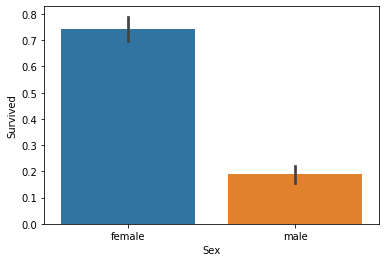

In [53]:
# Plot
sns.barplot(df['Sex'],df['Survived']);

Our hypothesis seems to be right. The world belongs to women, and so does the Titanic.

### 2.2.4. Age

'Age' is the next variable in the list. Our hypothesis is that children are more prone to survive, while people in its adult life may have a lower rate of survival. Personally, I don't have any special intuition about elders, since they are the most vulnerable. This can play for both sides: either people help elders because they are more vulnerable, or they they are not able to cope with the challenges posed by the wreck of a ship.

Let's call the usual suspect (bar plot) to help us understanding the situation.

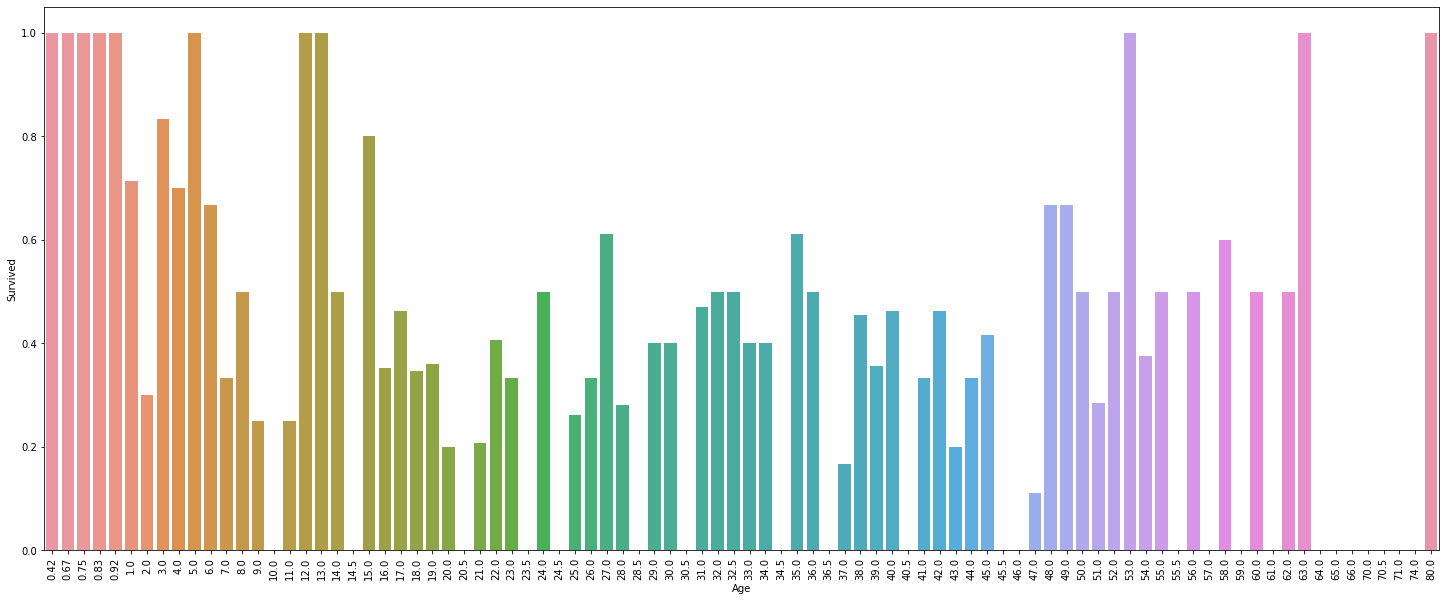

In [54]:
# Plot
plt.figure(figsize=(25,10))
sns.barplot(df['Age'],df['Survived'], ci=None)
plt.xticks(rotation=90);

With a little bit of creativity, we can say that the plot has three regions: 

1. One region that goes between age 0 and 15; 
2. One between age 15 and 48;
3. A last one between age 48 and 80. 

I know that this division is arguable, especially in what concerns the last two categories. However, the point is that this categories split fits into what we know about the way our society is organized: childrens, adults and elders. For now, let's proceed this way.

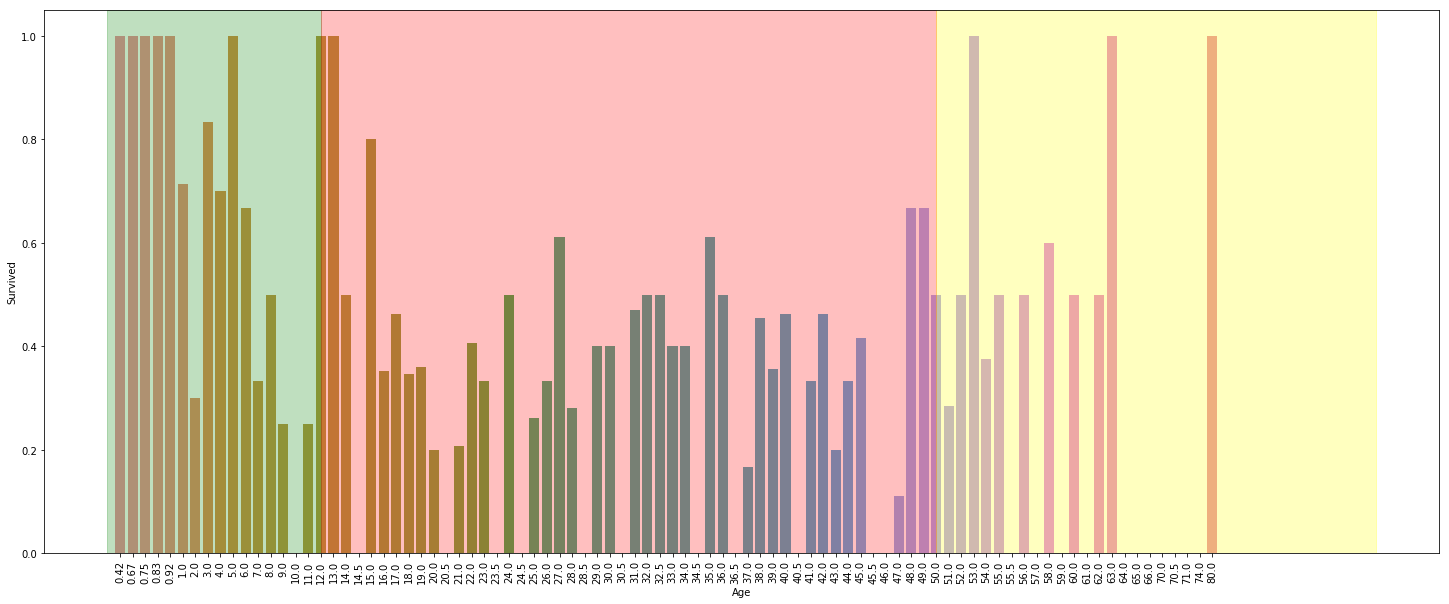

In [46]:
# Plot
'''
Probably, there is an easier way to do this plot. I had a problem using
plt.axvspan because the xmin and xmax values weren't
being plotted correctly. For example, I would define xmax = 12 and only 
the area between 0 and 7 would be filled. This was happening because my 
X-axis don't follow a regular (0, 1, ..., n) sequence. After some trial
and error, I noticed that xmin and xmax refer to the number of elements in
the X-axis coordinate that should be filled. Accordingly, I defined two 
variables, x_limit_1 and x_limit_2, that count the number of elements that
should be filled in each interval. Sounds confusing? To me too.
'''
limit_1 = 12
limit_2 = 50

x_limit_1 = np.size(df[df['Age'] < limit_1]['Age'].unique())
x_limit_2 = np.size(df[df['Age'] < limit_2]['Age'].unique())

plt.figure(figsize=(25,10))
sns.barplot(df['Age'],df['Survived'], ci=None)

plt.axvspan(-1, x_limit_1, alpha=0.25, color='green')
plt.axvspan(x_limit_1, x_limit_2, alpha=0.25, color='red')
plt.axvspan(x_limit_2, 100, alpha=0.25, color='yellow')

plt.xticks(rotation=90);

In [55]:
# Bin data
df['Age'] = pd.cut(df['Age'], bins=[0, 12, 50, 200], labels=['Child','Adult','Elder'])
df['Age'].head()

0    Adult
1    Adult
2    Adult
3    Adult
4    Adult
Name: Age, dtype: category
Categories (3, object): [Child < Adult < Elder]

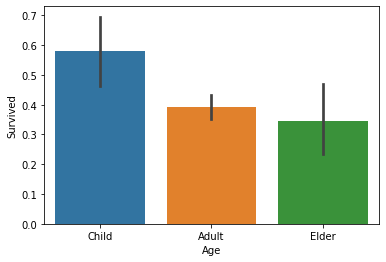

In [56]:
# Plot
sns.barplot(df['Age'], df['Survived']);

The plot shows that children have a higher survival rate. It also shows that, in terms of survival, there is not a significant difference between the categories 'Adult' and 'Elder'. For now, we will not make any change because there is a theoretical rationale behind this categorization. Nonetheless, it seems that it would be enough to just distinguish between children and adults.

### 2.2.5. FamilySize

Regarding family size, our hypothesis is that those who travel alone, have a lower survival rate. The idea is that people with family can collaborate and help each other escaping.

Let's see if that makes sense using our [beautiful and only friend](https://youtu.be/LsQtnBu3p7Y), the bar plot.

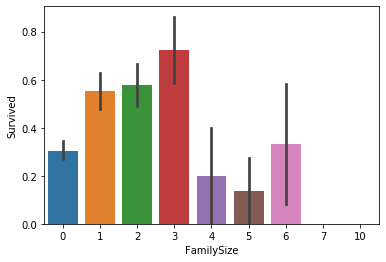

In [57]:
# Plot
sns.barplot(df['FamilySize'], df['Survived']);

As we can see, when 'FamilySize' is between 0 and 3, our hypothesis finds some support. People that are travelling alone have a lower survival rate than people who are travelling with one, two or three people more. 

However, when FamilySize is between 4 and 10, things start to change. Despite the large variability of the results, the survival rate drops. This may suggest that our hypothesis should be revised when 'FamilySize' is higher than 3. 

This variable seems to be more complex than expected. Accordingly, we will not make any transformation in this variable and we will leave it as a continuous variable to preserve all the information it has.

### 2.2.6. Fare

The same logic applied to 'Pclass' should work for 'Fare': higher fares, higher survival rate.

Since now we want to establish comparisons across different levels of a categorical variable, we will use a box plot instead of a bar plot.

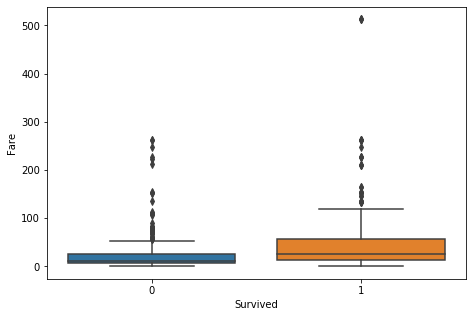

In [58]:
# Plot
plt.figure(figsize=(7.5,5))
sns.boxplot(df['Survived'], df['Fare']);

The plot suggests that those who survived paid a higher fare. Since we believe this variable is connected with 'Pclass', let's see how they work together.

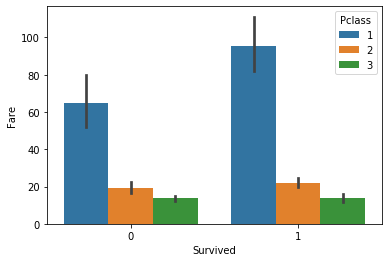

In [59]:
# Plot
sns.barplot(df['Survived'], df['Fare'], df['Pclass']);

Here we have an interesting result. It seems that 'Fare' doesn't make difference, in terms of survival, if you are travelling in second or third class. However, if you are travelling in first class, the higher the fare, the higher the chances of survival. Considering this, it would make sense to create interaction features between 'Fare' and 'Pclass'.

### 2.2.7. Embarked

The hypothesis regarding 'Embarked' is that it doesn't influence the chances of survival. It is hard to imagine a scenario in which people from Southampton, for instance, would such a competitive advantage, that it would make them more apt for survival than people from Queensland. Yes, in [Darwin](https://en.wikipedia.org/wiki/Natural_selection) we believe.

A simple plot can enlighten us.

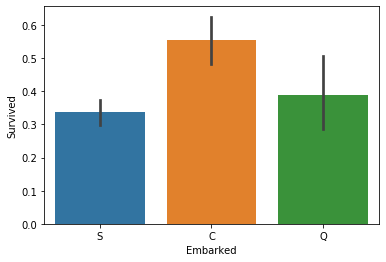

In [60]:
# Plot
sns.barplot(df['Embarked'], df['Survived']);

Ups... It seems that people embarking on C were selected by a superior entity to survive. This is strange and may be hidding some relationship that is not obvious with this plot (e.g. people embarking on C were mostly women). 

Let's dive deeper. 

In [61]:
# Compare with other variables
df.groupby(['Embarked']).mean()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,FamilySize,Imputed
Embarked,,,,,,,,
C,445.357143,0.553571,1.886905,0.386905,0.363095,59.954144,0.750000,0.226190
Q,417.896104,0.389610,2.909091,0.428571,0.168831,13.276030,0.597403,0.636364
S,449.527950,0.336957,2.350932,0.571429,0.413043,27.079812,0.984472,0.139752


It seems that people embarking on C were paying more and travelling in a better class than people embarking on Q and S.

In [62]:
# Relationship with age
df.groupby(['Embarked','Age'])['PassengerId'].count()

Embarked  Age  
C         Child     11
          Adult    104
          Elder     15
Q         Child      4
          Adult     21
          Elder      3
S         Child     54
          Adult    455
          Elder     45
Name: PassengerId, dtype: int64

No significant differences can be found.

In [64]:
# Relationship with sex
df.groupby(['Embarked','Sex'])['PassengerId'].count()

Embarked  Sex   
C         female     73
          male       95
Q         female     36
          male       41
S         female    203
          male      441
Name: PassengerId, dtype: int64

No significant differences can be found.

Considering the results above, I feel tempted to say that the embarkment point doesn't influence the survival rate. What really seems to be influencing is the class where people were travelling and how much they were spending.

For now, I will not delete the variable because I feel that I'm a little bit biased and trying to force a conclusion. However, let's keep in mind that maybe 'Embarked' doesn't affect 'Survived'.

## 2.3. Feature extraction

 

These two main issues are addressed in the following sub-sections:
1. Feature engineering, which is related to the generation of informative features; 
2. Feature selection, which regards the choice of a compact set of features.

### 2.3.1. Feature engineering

#### Data preparation